In [1]:
#!pip -q install ../python

# Navigation

---

This notebook is based on the code given as part of the Navigation project in the Udacity [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).
We will here interact with the Unity ML-Agents environment.

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from matplotlib import pyplot as plt
import seaborn
from pathlib import Path
from src.agent import Agent

resource_path = "resources"

Initilizes the resource directory used to store metrics, plots and weights from the experiment.
Make sure to point the resource_path variable above to another place unless you want it stored under "resources" next to the notebook.

In [3]:
resource_path = Path(resource_path)
#Create the resource directory if it does not exist
resource_path.mkdir(parents=True, exist_ok=True)

weight_path = resource_path.joinpath("weights")
plot_path = resource_path.joinpath("plots")
metric_path = resource_path.joinpath("metrics")

weight_path.mkdir(parents=True, exist_ok=True)
plot_path.mkdir(parents=True, exist_ok=True)
metric_path.mkdir(parents=True, exist_ok=True)


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
env = UnityEnvironment(file_name=r"Banana_Linux_NoVis/Banana.x86_64", worker_id=8090 )

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


When finished, you can close the environment.

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

The problem is solved once we got +13 in score over 100 conscutive episodes.

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
print(agent.qnetwork_local)

env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

QNetwork(
  (model): Sequential(
    (linear_0): Linear(in_features=37, out_features=64, bias=True)
    (relu_0): ReLU()
    (linear_1): Linear(in_features=64, out_features=64, bias=True)
    (relu_1): ReLU()
    (linear_2): Linear(in_features=64, out_features=4, bias=True)
  )
)


Episode 10	Average Score: 0.80
Episode 20	Average Score: 0.30
Episode 30	Average Score: 0.23
Episode 40	Average Score: 0.05
Episode 50	Average Score: 0.14
Episode 60	Average Score: 0.32
Episode 70	Average Score: 0.51
Episode 80	Average Score: 0.70
Episode 90	Average Score: 0.90
Episode 100	Average Score: 1.06
Episode 110	Average Score: 1.30
Episode 120	Average Score: 1.61
Episode 130	Average Score: 1.87
Episode 140	Average Score: 2.31
Episode 150	Average Score: 2.63
Episode 160	Average Score: 3.04
Episode 170	Average Score: 3.31
Episode 180	Average Score: 3.85
Episode 190	Average Score: 4.18
Episode 200	Average Score: 4.71
Episode 210	Average Score: 5.08
Episode 220	Average Score: 5.38
Episode 230	Average Score: 5.94
Episode 240	Average Score: 6.38
Episode 250	Average Score: 6.83
Episode 260	Average Score: 7.17
Episode 270	Average Score: 7.72
Episode 280	Average Score: 7.86
Episode 290	Average Score: 8.05
Episode 300	Average Score: 8.20
Episode 310	Average Score: 8.31
Episode 320	Avera

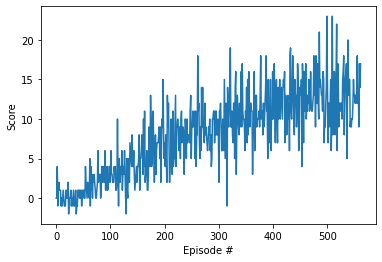

In [8]:
from collections import deque

score_goal = 13

def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    is_beta = 0.4
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):

            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            

            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 10 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=score_goal:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            np.save(str(metric_path.joinpath("dqn_goal.npy")), np.array(i_episode-100))
            
            torch.save(agent.qnetwork_local.state_dict(), str(weight_path.joinpath('dqn_checkpoint.pth')))
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)

#
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

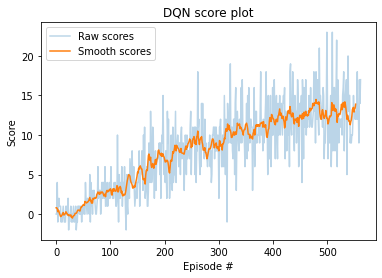

In [10]:
np.save(str(metric_path.joinpath("dqn_scores.npy")), np.array(scores))

mean_scores = moving_average(scores, 10)
plt.plot(np.arange(len(scores)), scores, alpha=0.3, label="Raw scores")
plt.plot(np.arange(len(mean_scores)), mean_scores, label="Smooth scores")
plt.legend(loc="upper left")
plt.title("DQN score plot")
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.savefig(str(plot_path.joinpath("dqn_score_plot.png")))

In [11]:
del agent
env.close()
